In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from minisom import MiniSom

In [2]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('data/iris.data', header=None, names=columns)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1:].values.ravel()

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.018065413370674105
 topographic error: 0.14


Text(0.5, 1.0, 'Heatmap íris\nlr: 0.5, sig: 3.0, erro_q: 0.02, erro_t: 0.14\nneighborhood_function: triangle')

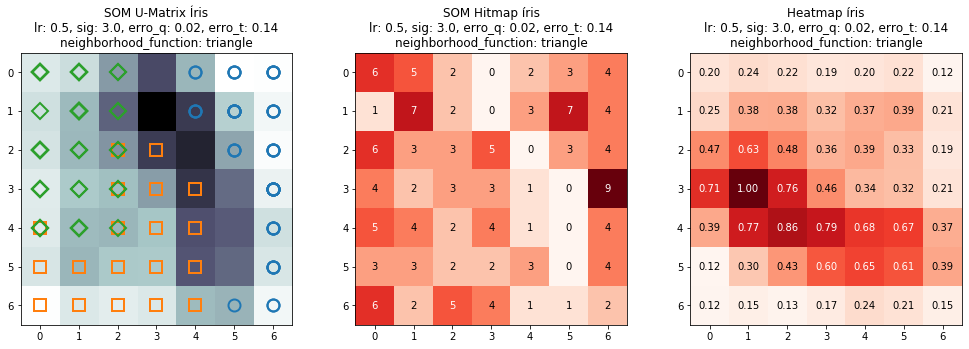

In [137]:
functions = ['gaussian', 'mexican_hat', 'bublle', 'triangle']
func, lr, sig = functions[3], 0.5, 3.0

som = MiniSom(x=7, y=7, input_len=4, sigma=sig, learning_rate=lr, random_seed=42, 
             neighborhood_function=func)
som.pca_weights_init(X)
som.train(X, num_iteration=1000, verbose=True)

# plots
fig, ax = plt.subplots(1, 3, figsize=(17, 5))
eq = som.quantization_error(X)
et = som.topographic_error(X)

#ax u-matrix
ax[0].imshow(som.distance_map().T, cmap='bone_r')
markers = {'Iris-setosa': 'o', 'Iris-versicolor': 's', 'Iris-virginica': 'D'}
colors = {'Iris-setosa': 'C0', 'Iris-versicolor': 'C1', 'Iris-virginica': 'C2'}
for i, x in enumerate(X):
    w = som.winner(x)
    marker = markers[y[i]]
    color = colors[y[i]]
    ax[0].plot(w[0], w[1], marker, markerfacecolor='None',
             markeredgecolor=color, markersize=12, markeredgewidth=2)
ax[0].set_title('SOM U-Matrix Íris\nlr: %s, sig: %s, erro_q: %.2f, erro_t: %.2f\nneighborhood_function: %s'%(lr, sig, eq, et, func))
# ax[0].set_xticks([]); ax[0].set_yticks([]);

#ax hitmap
freq = som.activation_response(X).astype(int)
cmap = ax[1].imshow(freq.T, cmap='Reds') 
for (i, j), z in np.ndenumerate(freq.T):
    color = 'w' if z > freq.T.max()/2 else 'k'
    ax[1].text(j, i, z, ha='center', va='center', color=color)
# ax[1].colorbar(cmap)
ax[1].set_title('SOM Hitmap íris\nlr: %s, sig: %s, erro_q: %.2f, erro_t: %.2f\nneighborhood_function: %s'%(lr, sig, eq, et, func))

#ax heatmap
dm = som.distance_map()
ax[2].imshow(dm, cmap="Reds")
# ax[2].colorbar()
for i in range(dm.shape[0]):
    for j in range(dm.shape[1]):
        color = 'w' if dm[i][j] > dm.max()/2 else 'k'
        ax[2].text(j, i, '%.2f'%dm[i][j], ha='center', va='center', color=color)
ax[2].set_title('Heatmap íris\nlr: %s, sig: %s, erro_q: %.2f, erro_t: %.2f\nneighborhood_function: %s'%(lr, sig, eq, et, func))

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.041720460112523394
 topographic error: 0.02


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.05190058109091897
 topographic error: 0.0


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.08487280409429042
 topographic error: 0.02


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.02340540721769101
 topographic error: 0.04


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.07431850701249268
 topographic error: 0.0


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.28899520822644104
 topographic error: 0.03333333333333333


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.026552292155189748
 topographic error: 0.11333333333333333


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.1849775871873409
 topographic error: 0.14


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.5745818536247383
 topographic error: 0.02


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.122459250912137
 topographic error: 0.0


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.21275923566578525
 topographic error: 0.6666666666666666


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.1554266259472397
 topographic error: 0.14


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.0408066484020926
 topographic error: 0.0


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.011413630789228
 topographic error: 0.0


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.22740973341069548
 topographic error: 0.5733333333333334


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.177247012365942
 topographic error: 1.0


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.8285692446542848
 topographic error: 0.0


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.5167960130329128
 topographic error: 0.02666666666666667


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.1475784858702305
 topographic error: 0.5333333333333333


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.038736701951234506
 topographic error: 0.013333333333333334


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.042447750538071864
 topographic error: 0.04666666666666667


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.175071152794777
 topographic error: 0.5333333333333333


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.5163195002102777
 topographic error: 0.0


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.05471803224109628
 topographic error: 0.12


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.541376680447122
 topographic error: 0.06


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.06180680390612191
 topographic error: 0.54


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.14910340153307328
 topographic error: 0.11333333333333333


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.1371015882839237
 topographic error: 0.5333333333333333


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.04616446582808706
 topographic error: 0.16666666666666666


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.025874018772198092
 topographic error: 0.06666666666666667


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.151989988249874
 topographic error: 0.5333333333333333


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.011826668610670587
 topographic error: 0.17333333333333334


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.0150448957803116
 topographic error: 0.2


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.41415295306635974
 topographic error: 0.04


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.012291181950610441
 topographic error: 0.5266666666666666


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.029493069360427077
 topographic error: 0.25333333333333335


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


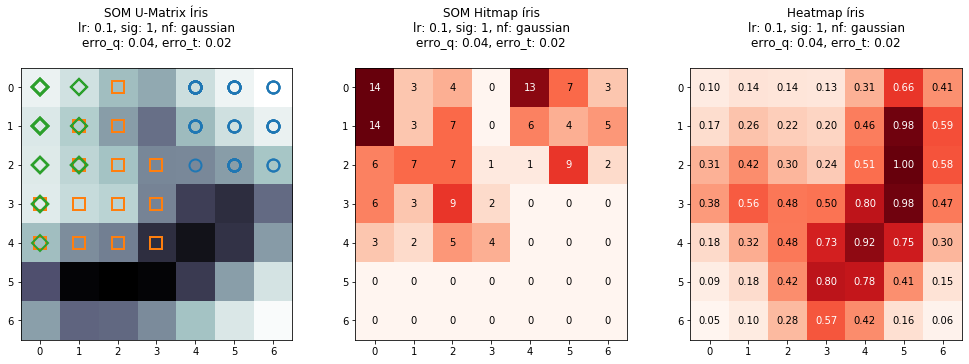

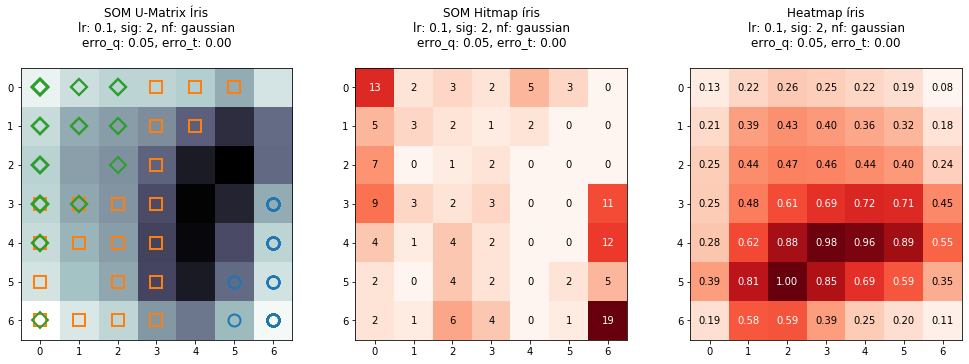

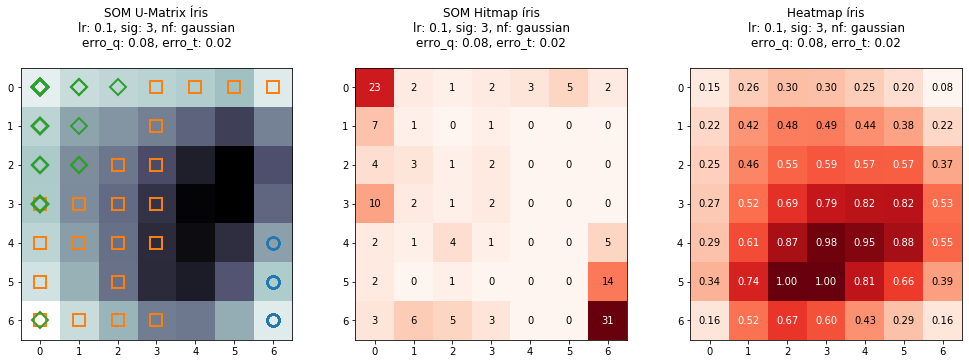

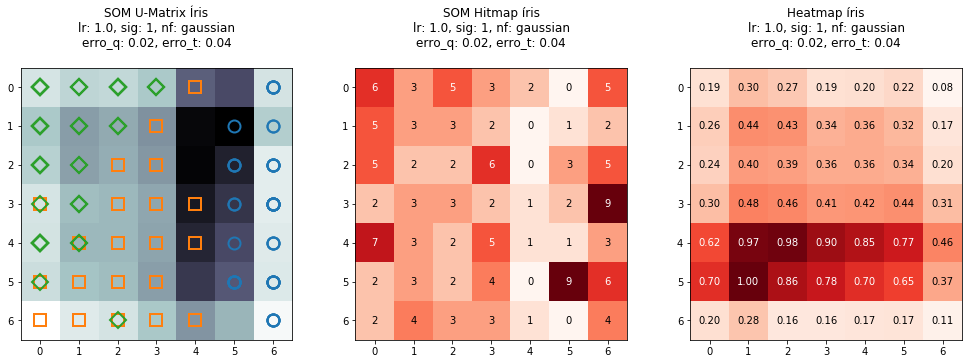

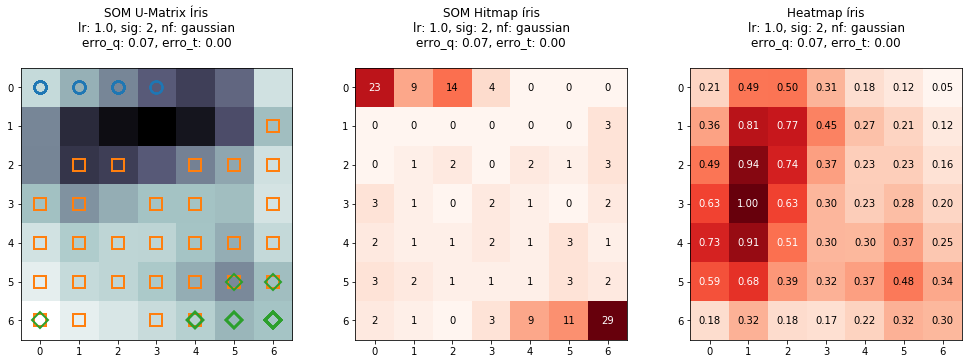

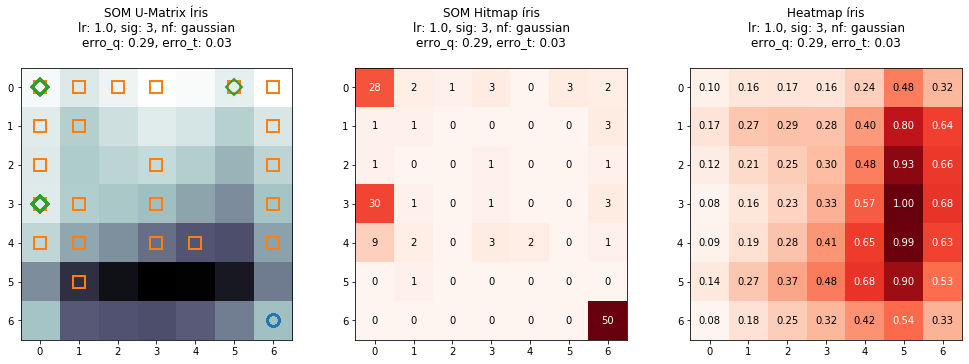

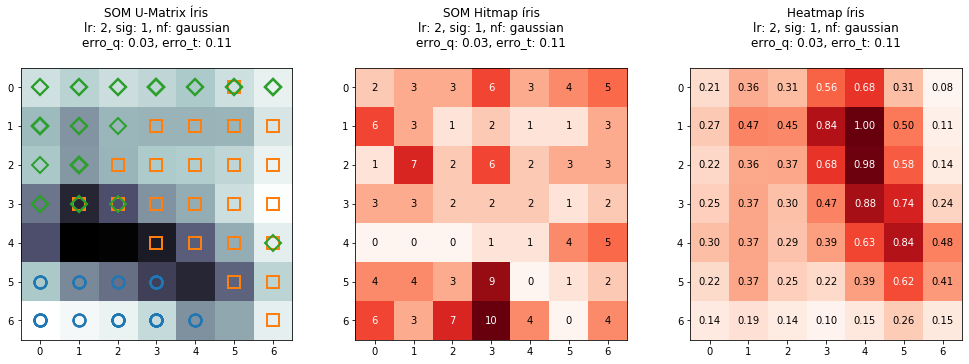

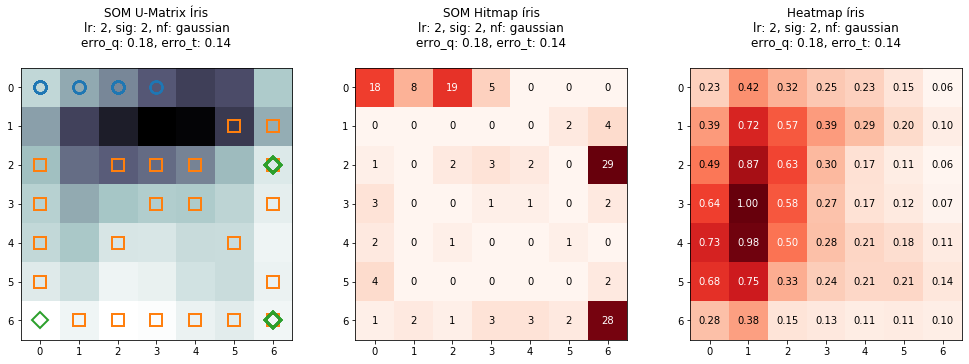

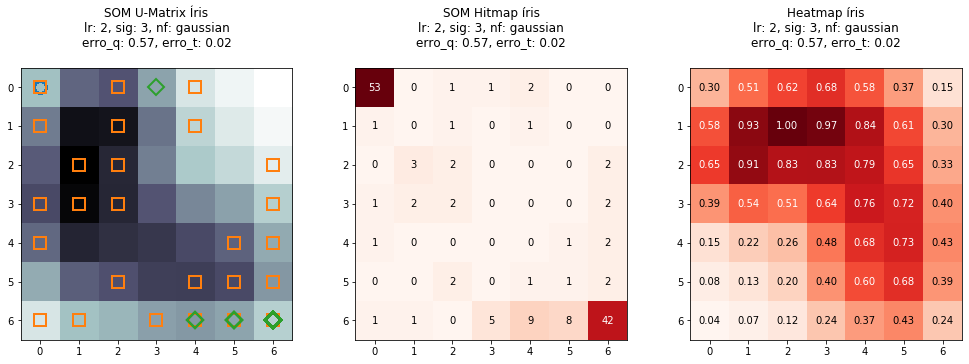

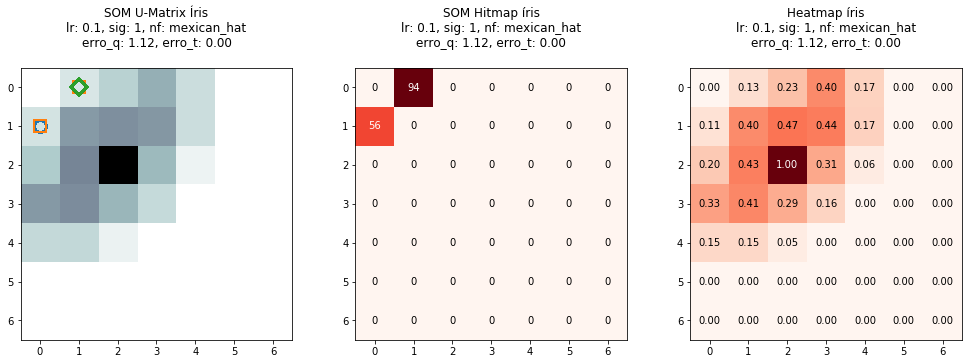

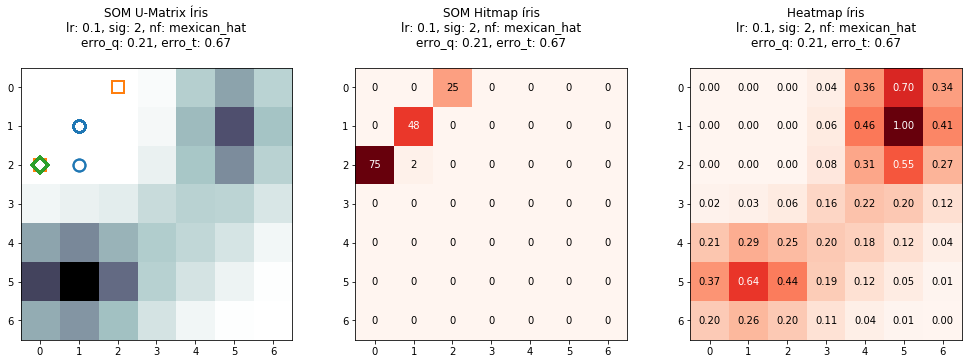

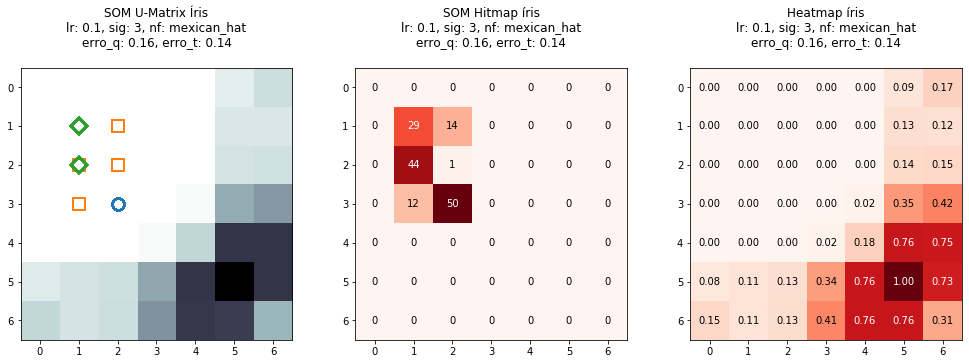

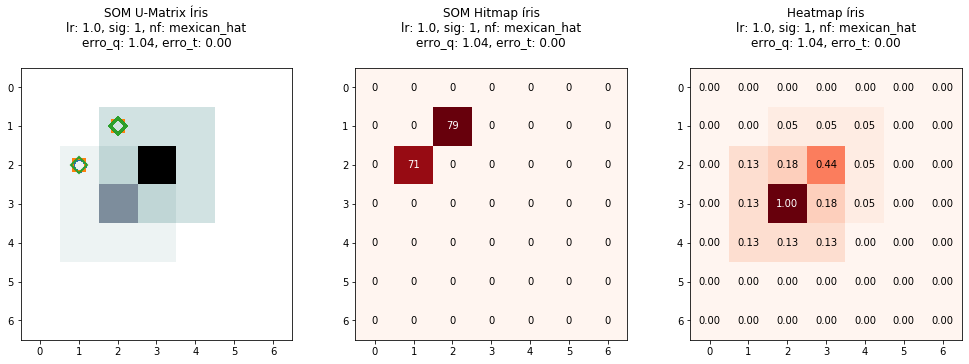

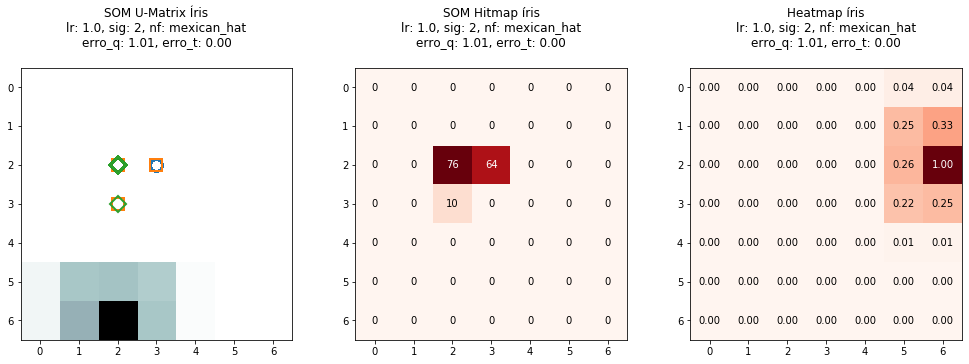

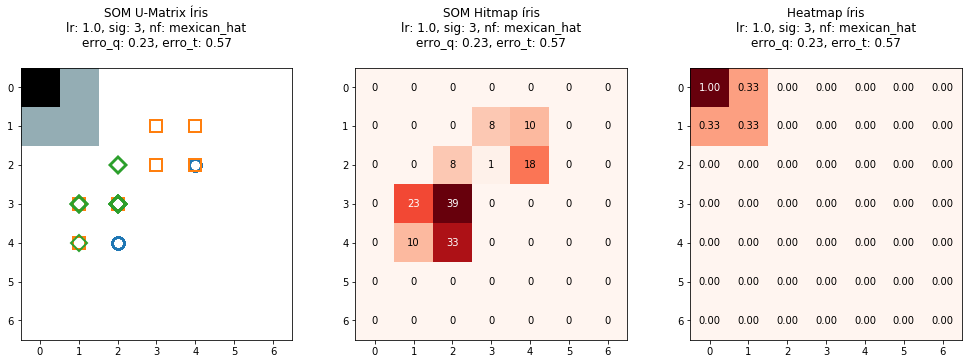

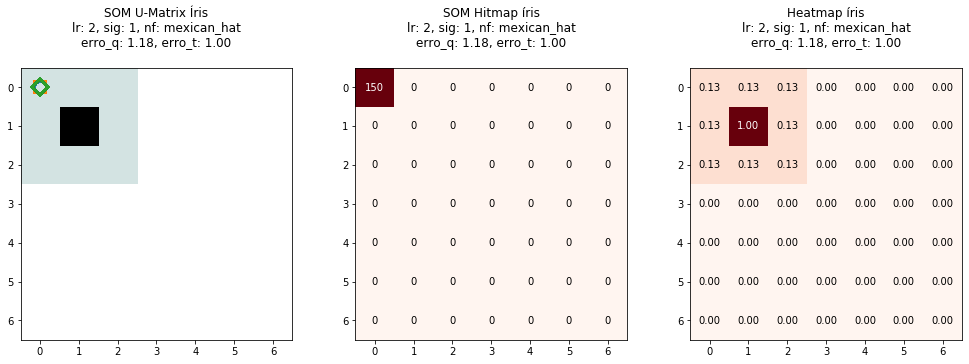

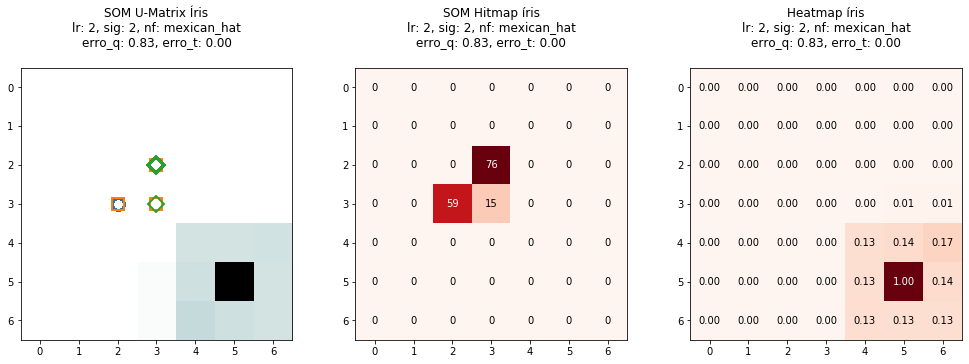

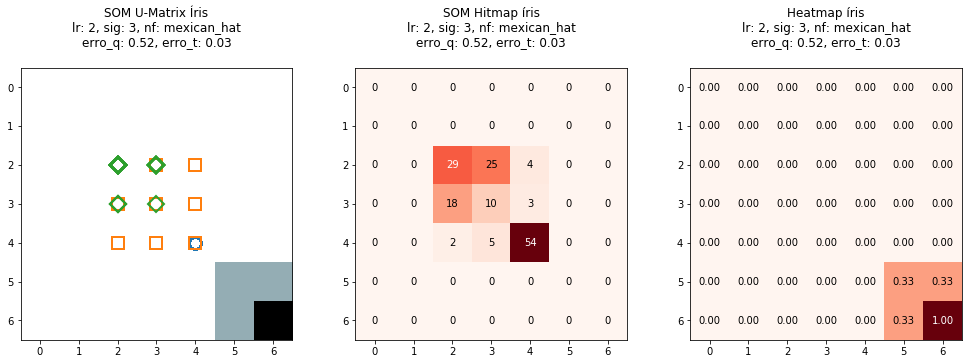

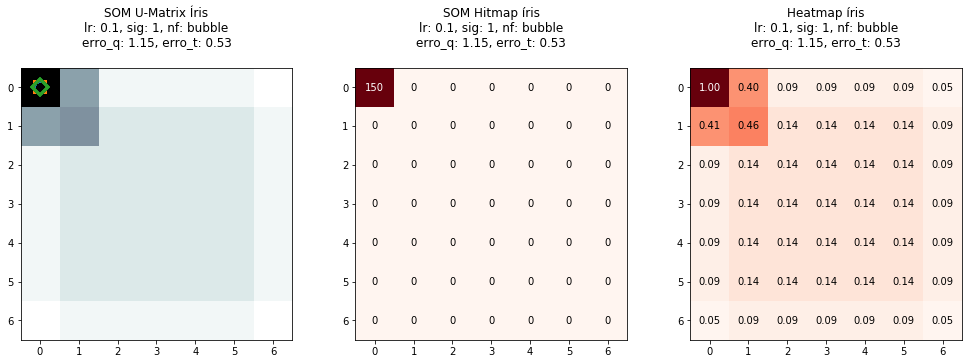

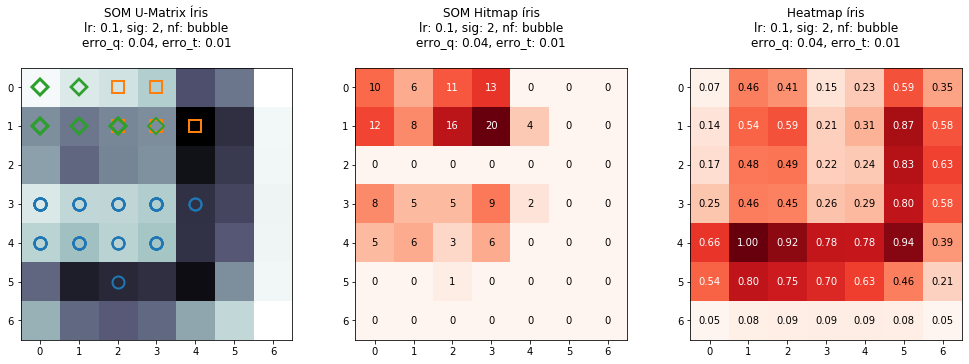

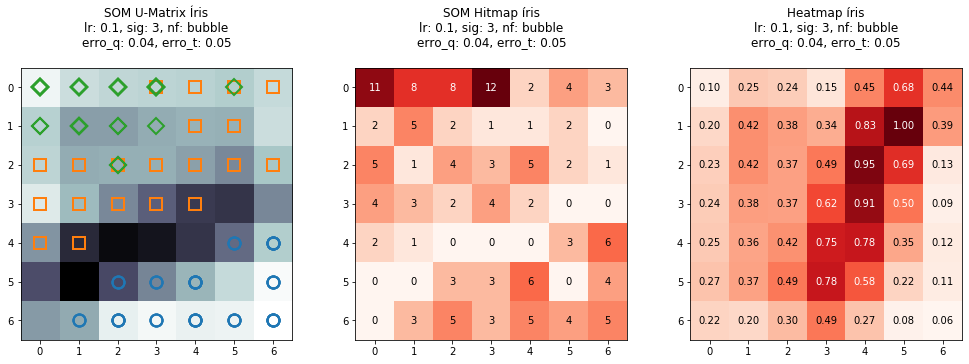

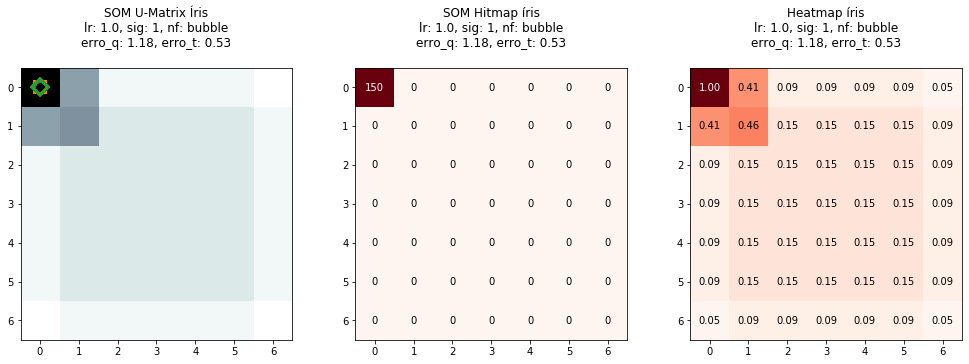

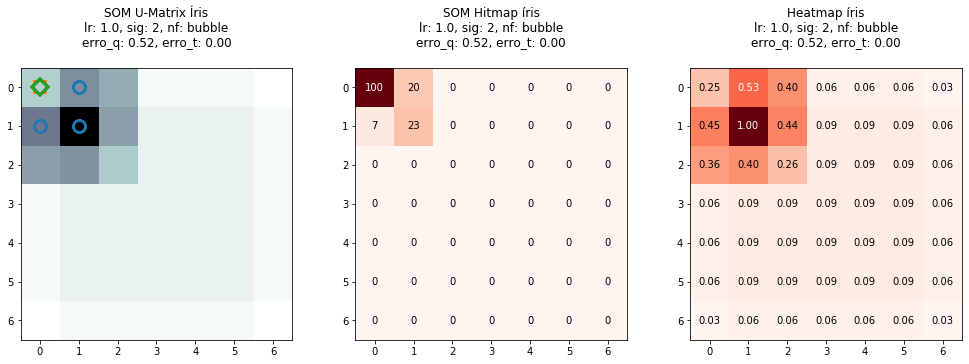

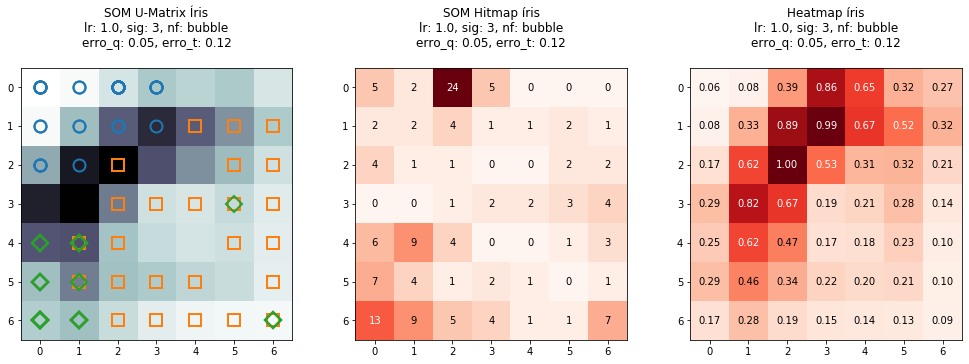

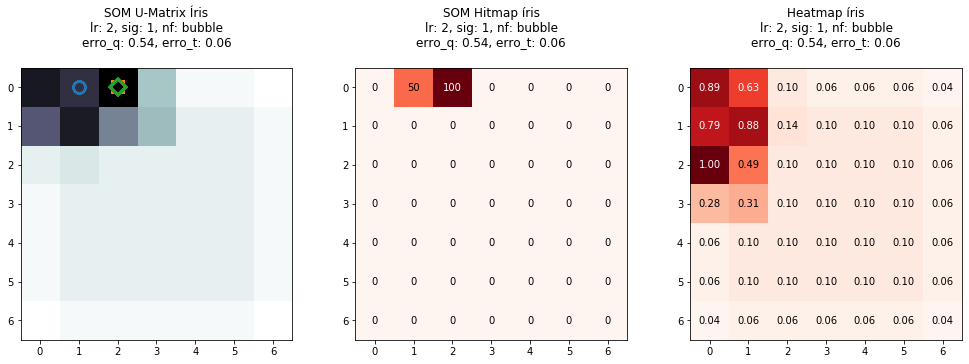

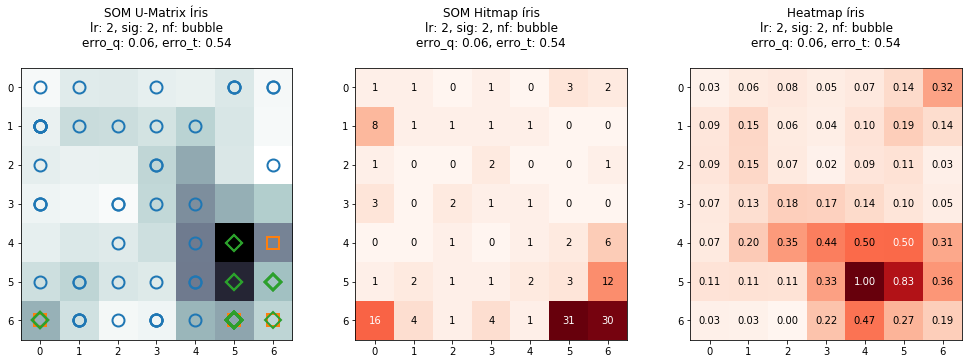

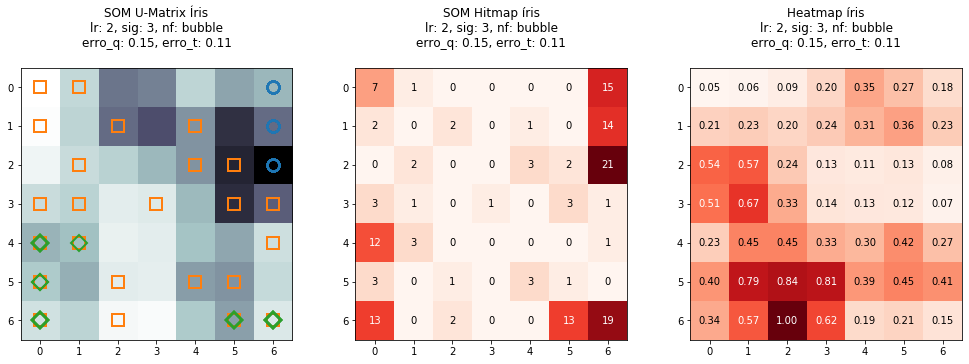

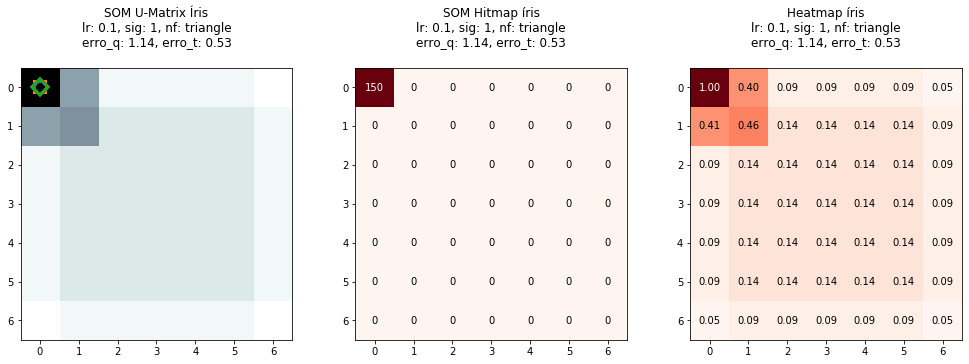

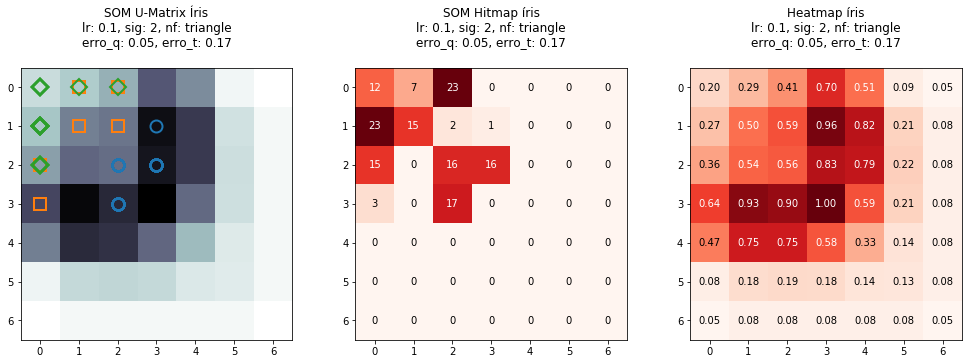

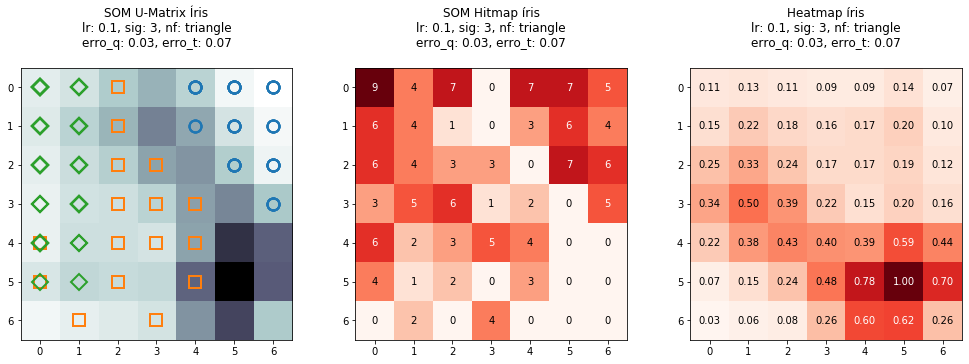

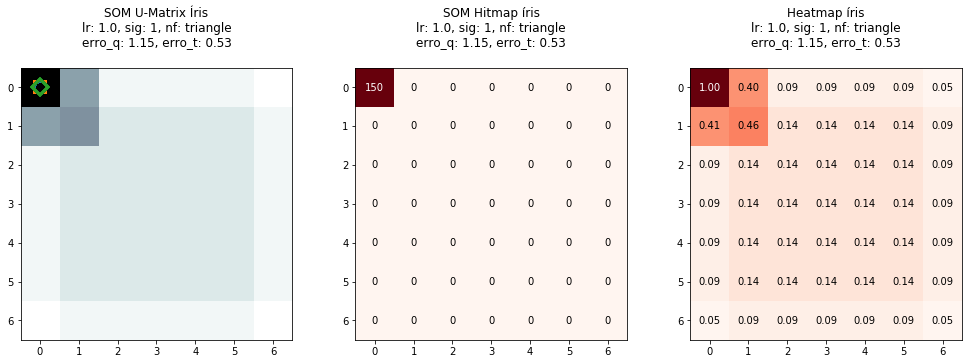

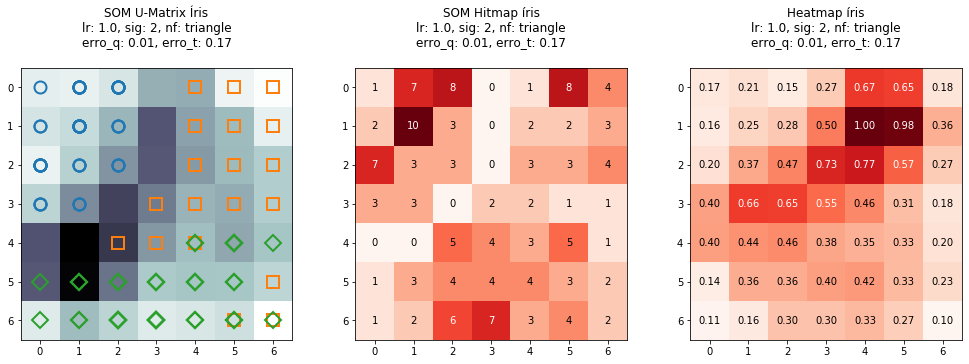

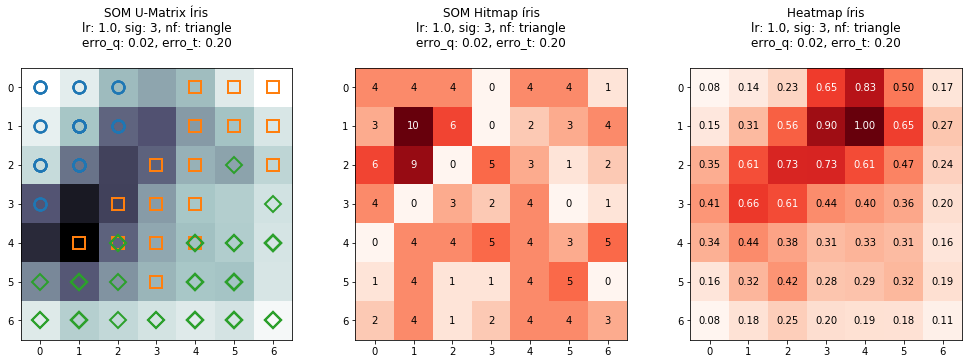

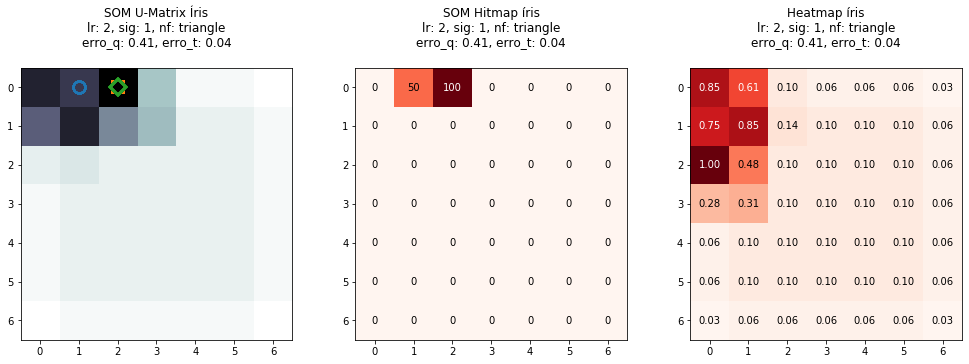

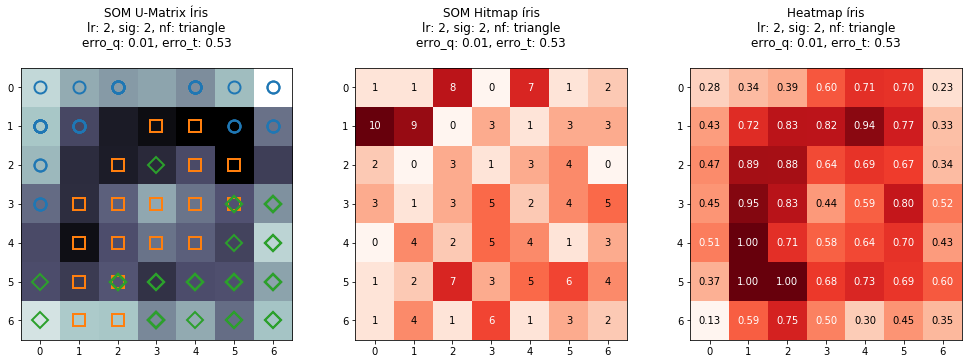

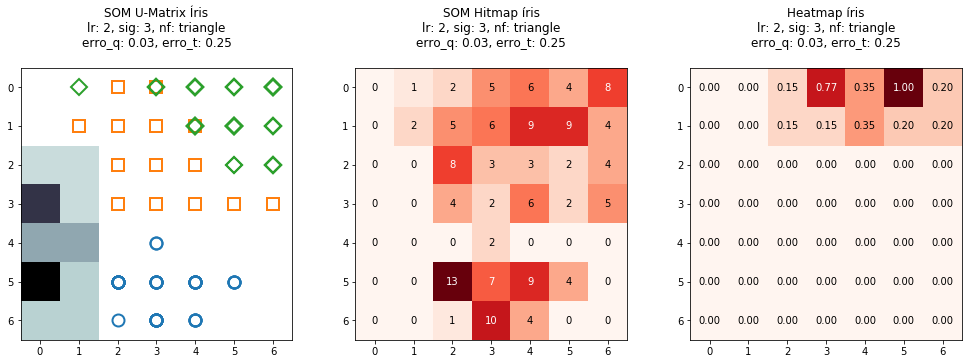

In [145]:
def run_som(func, lr, sig):
    som = MiniSom(x=7, y=7, input_len=4, sigma=sig, learning_rate=lr, random_seed=42, 
             neighborhood_function=func)
    som.pca_weights_init(X)
    som.train(X, num_iteration=1000, verbose=True)

    # plots
    fig, ax = plt.subplots(1, 3, figsize=(17, 5))
    eq = som.quantization_error(X)
    et = som.topographic_error(X)

    #ax u-matrix
    ax[0].imshow(som.distance_map().T, cmap='bone_r')
    markers = {'Iris-setosa': 'o', 'Iris-versicolor': 's', 'Iris-virginica': 'D'}
    colors = {'Iris-setosa': 'C0', 'Iris-versicolor': 'C1', 'Iris-virginica': 'C2'}
    for i, x in enumerate(X):
        w = som.winner(x)
        marker = markers[y[i]]
        color = colors[y[i]]
        ax[0].plot(w[0], w[1], marker, markerfacecolor='None',
                 markeredgecolor=color, markersize=12, markeredgewidth=2)
    ax[0].set_title('SOM U-Matrix Íris\nlr: %s, sig: %s, nf: %s\nerro_q: %.2f, erro_t: %.2f\n'%
                    (lr, sig, func, eq, et))
    # ax[0].set_xticks([]); ax[0].set_yticks([]);

    #ax hitmap
    freq = som.activation_response(X).astype(int)
    cmap = ax[1].imshow(freq.T, cmap='Reds') 
    for (i, j), z in np.ndenumerate(freq.T):
        color = 'w' if z > freq.T.max()/2 else 'k'
        ax[1].text(j, i, z, ha='center', va='center', color=color)
    # ax[1].colorbar(cmap)
    ax[1].set_title('SOM Hitmap íris\nlr: %s, sig: %s, nf: %s\nerro_q: %.2f, erro_t: %.2f\n'%
                    (lr, sig, func, eq, et))

    #ax heatmap
    dm = som.distance_map()
    ax[2].imshow(dm, cmap="Reds")
    # ax[2].colorbar()
    for i in range(dm.shape[0]):
        for j in range(dm.shape[1]):
            color = 'w' if dm[i][j] > dm.max()/2 else 'k'
            ax[2].text(j, i, '%.2f'%dm[i][j], ha='center', va='center', color=color)
    ax[2].set_title('Heatmap íris\nlr: %s, sig: %s, nf: %s\nerro_q: %.2f, erro_t: %.2f\n'%
                    (lr, sig, func, eq, et))
    plt.savefig('results/som_001_f%s_lr%s_sig%s.pdf'%(func, lr, sig), dpi=600, bbox_inches='tight', 
                    transparent=False, pad_inches=0.1)

funcs = ['gaussian', 'mexican_hat', 'bubble', 'triangle']
lrs = [0.1, 1.0, 2]
sigs = [1, 2, 3]

for func in funcs:
    for lr in lrs:
        for sig in sigs:
            run_som(func, lr, sig)